# Inladen packages  & dataset

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

df=pd.read_excel("Complete-dataset.xlsx")

In [218]:
df.head()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,6.14,-0.16,2.3,GH2-04,6.3,2011,CAP,Fresh,Vitros,4.508
1,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,7.59,-0.01,2.5,GH2-05,7.6,2011,CAP,Fresh,Vitros,4.900
2,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,9.42,0.22,3,GH2-06,9.2,2011,CAP,Fresh,Vitros,5.880
3,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,5.42,-0.18,2.3,GH2-01,5.6,2012,CAP,Fresh,Vitros,4.508
4,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,9.34,-0.06,2.6,GH2-02,9.4,2012,CAP,Fresh,Vitros,5.096


# Business understanding

Deelvraag: Hoe verandert een merk over de jaren heen? (voorspelling total error)


Voor het Isala ziekenhuis is het van belang om inzicht te hebben hoe verschillende metingen worden uitgevoerd. Door voorspellingen te doen, zou het Isala ziekenhuis tijdig kunnen ingrijpen. Doordat sommige meetmehodes maar één keer in het rapport voorkomen, focussen we ons eerst op de fabrikant.


# Data understanding
Welke databronnen zijn gegeven en in welk formaat:
Een excel bestand genaamd: Complete-dataset.xlsx

Hoe groot zijn deze databronnen:
291 kB

-4684 rows

-12 cols

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4604 non-null   object 
 3   Bias                 4060 non-null   object 
 4   CV                   4586 non-null   object 
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4682 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 439.2+ KB


In [220]:
df.isna().sum()
#Bias, CV? Leeg -> Geen total error
df.dropna()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,6.14,-0.16,2.3,GH2-04,6.30,2011,CAP,Fresh,Vitros,4.508
1,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,7.59,-0.01,2.5,GH2-05,7.60,2011,CAP,Fresh,Vitros,4.900
2,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,9.42,0.22,3,GH2-06,9.20,2011,CAP,Fresh,Vitros,5.880
3,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,5.42,-0.18,2.3,GH2-01,5.60,2012,CAP,Fresh,Vitros,4.508
4,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,9.34,-0.06,2.6,GH2-02,9.40,2012,CAP,Fresh,Vitros,5.096
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.08,0.22,3.1,GH5-01,8.86,2021,CAP,Fresh,Vitros,6.076
4680,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.86,0.02,2.6,GH5-02,6.84,2021,CAP,Fresh,Vitros,5.096
4681,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.4,0.01,3.4,GH5-03,9.39,2021,CAP,Fresh,Vitros,6.664
4682,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.14,0.01,2.5,GH5-04,6.13,2021,CAP,Fresh,Vitros,4.900


In [221]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reference Value,4656.0,7.361971,1.864492,4.92,5.80,7.100,8.65,13.000
Year,4684.0,2015.568531,4.261448,2006.00,2013.00,2017.000,2019.00,2021.000
Total Error,4682.0,5.759066,2.980117,0.00,3.92,5.096,6.86,28.216


In [222]:
#Hoeveel metingen per merk
df["Manufacturer"].value_counts()


Siemens                       982
Bio-Rad                       788
Roche                         618
Beckman Coulter               384
Tosoh                         349
Abbott                        310
Sebia                         203
Trinity Biotech               188
Vitros                        162
Alere                         121
Arkray                         95
Axis-Shield                    57
Roche Diagnostics              56
Menarini                       52
Primus                         42
Roche/Hitachi                  42
Bayer                          36
Olympus                        30
Metrika                        30
Dade Behring                   24
Synchron                       24
Not specified                  20
JEOL                           15
Bayer/Metrika                  15
Medinor                         6
HemoCue                         6
Lifotronic                      4
EKF Diagnostics                 4
Sysmex                          4
Thermo Scienti

In [223]:
#Hoeveel unieke merken
df["Manufacturer"].nunique()

35

# Data preparation

In [224]:
manufacturers = df.groupby("Manufacturer")
manufacturers.size()

Manufacturer
Abbott                        310
Alere                         121
Arkray                         95
Axis-Shield                    57
Bayer                          36
Bayer/Metrika                  15
Beckman Coulter               384
Bio-Rad                       788
BioMajesty                      4
Dade Behring                   24
Diasys                          2
EKF Diagnostics                 4
HemoCue                         6
JEOL                           15
Lifotronic                      4
Medinor                         6
Menarini                       52
Metrika                        30
Mindray                         2
Not specified                  20
Olympus                        30
Ortho Clinical Diagnostics      2
Pointe Scientific               3
Primus                         42
Roche                         618
Roche Diagnostics              56
Roche/Hitachi                  42
Sebia                         203
Siemens                       982
S

In [225]:
list_top10 = df['Manufacturer'].value_counts()[:10].index.tolist()
top10_manufacturers = df.loc[df['Manufacturer'].isin(list)]
top10_manufacturers['Manufacturer'].value_counts()

Siemens            982
Bio-Rad            788
Roche              618
Beckman Coulter    384
Tosoh              349
Abbott             310
Sebia              203
Trinity Biotech    188
Vitros             162
Alere              121
Name: Manufacturer, dtype: int64

In [226]:
Siemens = top10_manufacturers[top10_manufacturers['Manufacturer'] == 'Siemens']
Siemens.shape

(982, 12)

In [227]:
top10_manufacturers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4105 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4105 non-null   object 
 1   N (no. labs)         4105 non-null   object 
 2   Mean                 4048 non-null   object 
 3   Bias                 3681 non-null   object 
 4   CV                   4039 non-null   object 
 5   Sample               4105 non-null   object 
 6   Reference Value      4080 non-null   float64
 7   Year                 4105 non-null   int64  
 8   Source (CAP/EurA1c)  4105 non-null   object 
 9   Type (Fresh/frozen)  4105 non-null   object 
 10  Manufacturer         4105 non-null   object 
 11  Total Error          4103 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 416.9+ KB


In [228]:
# Plot all total error of manufacturers
# manufacturers.plot(x='Manufacturer',y='Total Error')

<AxesSubplot:xlabel='Year', ylabel='Total Error'>

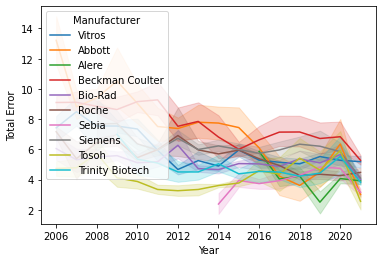

In [229]:
sns.lineplot(x="Year", y="Total Error",
             hue="Manufacturer", 
             data=top10_manufacturers)

In [230]:
top10_manufacturers.columns = top10_manufacturers.columns.str.replace('Total Error', 'Total')
top10_manufacturers.columns

Index(['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
       'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
       'Manufacturer', 'Total'],
      dtype='object')

In [231]:
Siemens.columns = Siemens.columns.str.replace('Total Error', 'Total')
Siemens.columns

Index(['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
       'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
       'Manufacturer', 'Total'],
      dtype='object')

# Modeling

In [232]:
#model regressie trainen en testen
#R2 zegt iets over de bruikbaarheid van je model
traindata, testdata = train_test_split(Siemens, train_size=0.65, test_size=0.35, random_state=42)

#eerst afhankelijke variabele, dus hierbij 'Manufacturer'
mod1 = ols(formula='Year ~ Total', data=traindata).fit()
print(mod1.summary())



                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     18.91
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.60e-05
Time:                        15:22:41   Log-Likelihood:                -1701.1
No. Observations:                 638   AIC:                             3406.
Df Residuals:                     636   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2017.0694      0.358   5634.559      0.0

In [233]:
#weer afhankelijke variable
# print(testdata["Manufacturer"].corr(mod1.predict(testdata)) **2)

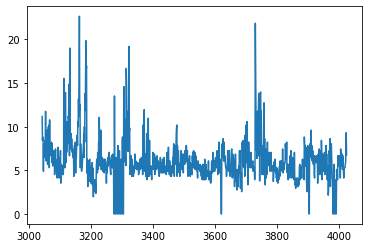

In [234]:
plt.plot(Siemens["Total"],label='Total error')